In [1]:
%matplotlib inline

import sys, os
sys.path.append(os.path.abspath(os.path.join('..', 'src/')))
from sgpi.plot import *

import pandas as pd
import pysgpp as sg

In [20]:
def get_terms_level(dim, level, T):
    grid = sg.Grid.createModLinearGrid(dim)
    gen = grid.getGenerator()
    gen.regular(level, T)
    storage = grid.getStorage()
    terms = {}
    print grid.getSize()
    for i in range(0, grid.getSize()):
        p = storage.get(i)
        num = 0
        for d in range(0,dim):
            if p.getCoord(d) != 0.5:
                num += 1
        if num not in terms:
            terms[num] = 0
        terms[num] = terms[num] + 1
    return terms

In [21]:
#TODO: Drop bias!
dim = 4
level = 5
Ts = [float('-inf'), 0.0, 0.4, 0.6, 1.0]
terms = []
for T in Ts:
    t = get_terms_level(dim, level, T)
    t['T'] = T
    terms.append(t)
df = pd.DataFrame(terms)
df = pd.melt(df, id_vars=['T'], value_vars=[0, 1, 2, 3, 4], var_name='order', value_name='num').dropna()
df = df[df['order'] != 0] # ignore bias

923521
769
241
145
121


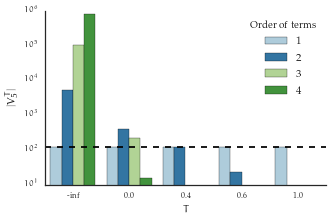

In [22]:
fig, ax = plt.subplots(figsize=figsize(scale=0.9))
axs = sns.barplot(x='T', y='num', hue='order', order=Ts, data=df, ax=ax, palette='Paired')
#Show dotted line that emphasizes that the amount of terms with order 1 stays the same
order_one_n = df[df['order'] == 1]['num'].values[0]
ax.axhline(order_one_n, c='black', linestyle='dashed')
ax.set_ylabel(r"$\vert V^T_5 \vert$")
ax.set_xlabel(r"$T$")
ax.set_yscale('log')
legend = ax.legend(title="Order of terms")
plt.setp(legend.get_title(),fontsize=10)
sns.despine(fig)
fig.subplots_adjust(bottom=0.15, left=0.15)
fig.savefig("../writing/thesis/figures/interactionT.pdf")

In [13]:
df

,T,order,num
5,-inf,1,120.0
6,0.000000,1,120.0
7,0.400000,1,120.0
8,0.600000,1,120.0
9,1.000000,1,120.0
10,-inf,2,5400.0
11,0.000000,2,408.0
12,0.400000,2,120.0
13,0.600000,2,24.0
15,-inf,3,108000.0
